# Comparing Switzerland to the world on Amazon

We found these statistics about the dataset on amazon: http://minimaxir.com/2017/01/amazon-spark/, credits: Max Woolf. Based on his analysis we made a comparison computing the same analysis but with only swiss reviews.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from ggplot import *
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-notebook')
#['grayscale', 'fivethirtyeight', 'seaborn-deep', 'bmh', 'seaborn-poster', 'seaborn-ticks', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-white', 'seaborn-bright', 'seaborn-paper', 'seaborn-pastel', 'seaborn-colorblind', 'seaborn-notebook', 'seaborn-dark-palette', 'dark_background', 'ggplot', 'seaborn-muted', 'seaborn-talk', 'classic']

## 1 Explore products dataset

We start by looking at the product data without the reviews.

Load the product data in a dataframe

In [2]:
def parse(path):
  f = open(path, 'r')
  for l in f:
    yield eval(l)
  f.close()
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df_products = getDF('data/swiss_products.json')
df_products = df_products.sort_values(['brand', 'price'])
df_products[df_products['brand'] == 'victorinox']

,categories,description,price,related,salesrank,imurl,asin,brand,title
417,"[[home & kitchen, kitchen & dining, kitchen kn...","victorinox, makers of the original swiss army ...",2.15,"{'also_viewed': ['b000t3ov1c', 'b009t6og6k', '...",{'kitchen & dining': 49337},http://ecx.images-amazon.com/images/i/31cx835u...,b000931dtk,victorinox,"victorinox bone dust scraper, square, white poly"
4494,"[[sports & outdoors, hunting & fishing, fishin...",victorinox small scissor spring 6 pieces. fits...,3.21,"{'also_viewed': ['b0013hbj8q', 'b001czdgto', '...",{'sports &amp; outdoors': 22137},http://ecx.images-amazon.com/images/i/31l8oo18...,b0031phofk,victorinox,victorinox 6 pc small swiss army knife scissor...
4554,"[[sports & outdoors, outdoor gear, camping & h...",a 6 pack of small replacement scissor springs ...,3.21,"{'also_viewed': ['b0031phofk', 'b0035n33xk', '...",{'sports &amp; outdoors': 18128},http://ecx.images-amazon.com/images/i/31o8v7l6...,b0035mx7by,victorinox,victorinox 6 pc large swiss army knife scissor...
4556,"[[tools & home improvement, power & hand tools...",a 6 pack of small replacement scissor springs ...,3.21,"{'also_viewed': ['b0031phofk', 'b0035mx7by', '...",{'sports &amp; outdoors': 88423},http://ecx.images-amazon.com/images/i/31eqs0nr...,b0035n33xk,victorinox,victorinox swiss army 38409 replacement scisso...
2360,"[[office products, office & school supplies, f...",victorinox small keyring. set of six.,3.53,"{'also_viewed': ['b000ovi0ac', 'b000rb77n0', '...",{'sports &amp; outdoors': 36866},http://ecx.images-amazon.com/images/i/412ommxn...,b001h3qvpm,victorinox,"replacement key ring, small, 6 pack"
5158,"[[sports & outdoors, outdoor gear, camping & h...",victorinox large toothpick. set of six.,3.53,"{'also_viewed': ['b001czdgto', 'b0016ctazc', '...",{'sports &amp; outdoors': 6188},http://ecx.images-amazon.com/images/i/21roy21o...,b003r042bi,victorinox,victorinox 6 piece large swiss army knife toot...
319,"[[sports & outdoors, hunting & fishing, huntin...","signal mirror for sos kit, for swiss champ sos.",3.95,"{'also_viewed': ['b007bf50o8', 'b008aynvfy', '...",{'sports &amp; outdoors': 705730},http://ecx.images-amazon.com/images/i/31jrzck4...,b0007d805w,victorinox,victorinox - replacement signal mirror
2217,"[[home & kitchen, kitchen & dining, kitchen ut...",victorinox small toothpick. set of six.,4.00,"{'also_viewed': ['b003r042bi', 'b0013hbj8q', '...",{'sports &amp; outdoors': 2641},http://ecx.images-amazon.com/images/i/31ajjppb...,b001czdgto,victorinox,"replacement toothpick, small, 6 pack"
1906,"[[office products, office & school supplies, w...",victorinox retractable ink pen refill.,4.16,"{'bought_together': ['b001czdgto'], 'buy_after...",NaN,http://ecx.images-amazon.com/images/i/11%2bsee...,b0017uxpoa,victorinox,victorinox swiss army knife retractable ink pe...
2218,"[[sports & outdoors, outdoor gear, camping & h...",large replacement ball point pen for the swiss...,4.16,"{'bought_together': ['b003r042bi', 'b0035n8bwi...",NaN,http://ecx.images-amazon.com/images/i/11%2b0fa...,b001czfkbq,victorinox,"victorinox replacement ball point pen, large, ..."


Our data contains false positives. We found no way of filtering them out besides a quick manual check.

In [3]:
df_products.brand.value_counts()

sib              1199
victorinox       1056
bsi               720
logitech          595
bell              451
pfister           429
psg               417
bulova            399
samsonite         366
unique            316
tissot            311
zodiac            302
mazda             269
kuhn rikon        255
tag heuer         211
kraft             202
wenger            199
lacoste           198
pelikan           156
weleda            139
davidoff           92
raymond weil       88
scott              88
la prairie         79
primo              78
maggi              73
ricola             67
arctic             66
cyma               62
atb                59
                 ... 
balmain             2
assos               2
vuarnet             2
insight             2
backyard            2
sf                  2
3a                  2
oh!                 2
emmi                2
blick               2
rsr                 2
revue thommen       2
lugano              2
perskindol          1
st. moritz

We decided to remove the obvious ones

In [4]:
false_positives = ['samsonite', 'mazda', 'lacoste', 'pelikan', 'bell']
df_products = df_products[~df_products.brand.isin(false_positives)]

Let's take a took at the data. We start with detecting NA values

In [5]:
for column_name in df_products.columns:
    print("NA values for " + column_name + ": " + str(df_products[column_name].isnull().sum()))

NA values for categories: 0
NA values for description: 1916
NA values for price: 276
NA values for related: 554
NA values for salesrank: 1689
NA values for imurl: 0
NA values for asin: 0
NA values for brand: 0
NA values for title: 0


We fill na values as follows: empty for salesrank, related and description, and average price for price

In [6]:
df_products['salesrank'].fillna(value='{}', inplace=True)
df_products['related'].fillna(value='{}', inplace=True)
df_products['description'].fillna(value='', inplace=True)
av_price = df_products['price'].mean()
df_products['price'].fillna(value=av_price, inplace=True)
av_price

81.26206010137464

The average price of the swiss products is **$79.73**.

Let's look at the most expansive product on amazon

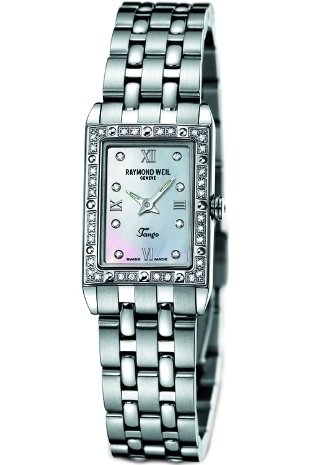

In [7]:
df_products[df_products.price == max(df_products['price'])].iloc[0].asin

from IPython.display import Image
Image(filename='data/expensivewatch.jpg') 

Let's look at some statistics about the products

In [8]:
df_products.price.describe()

count    8562.000000
mean       81.262060
std       138.515708
min         0.010000
25%        10.210000
50%        22.745000
75%        81.262060
max       999.000000
Name: price, dtype: float64

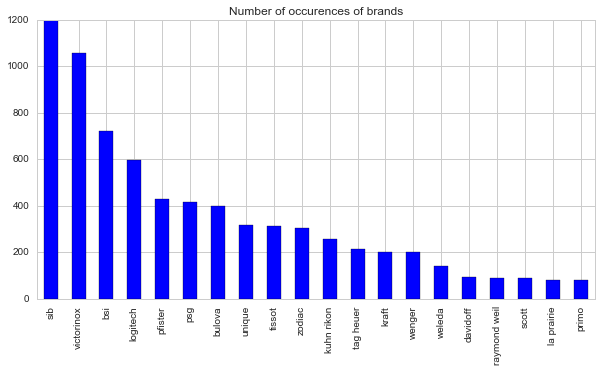

In [9]:
df_products.brand.value_counts()[:20].plot(kind='bar', figsize=(10,5), title="Number of occurences of brands")

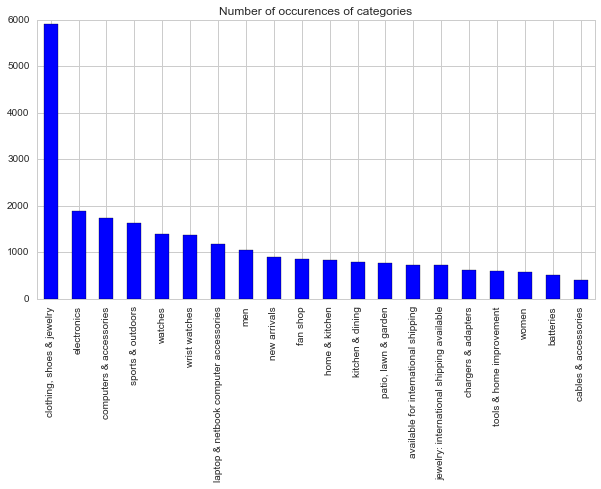

In [10]:
flatten = lambda l: [item for sublist in l for item in sublist]
categories_list = []
for categories in df_products.categories:
    for categorie in flatten(categories):
        categories_list.append(categorie)

pd.Series(categories_list).value_counts()[:20].plot(kind='bar', figsize=(10,5), title="Number of occurences of categories")

## 2. Explore review dataset

### transform data

In [11]:
df = pd.read_csv("data/amazon_ratings.csv")
df.head(10)

,user_id,item_id,rating,timestamp,category
0,A00027081JC8NE8X6TD5,B003U8ENTI,5.0,1367625600,"[[u'electronics', u'computers & accessories', ..."
1,A00090122PEQW7864EC8L,B004JW1B8A,1.0,1354492800,"[[u'toys & games', u'party supplies', u'party ..."
2,A0009686KROLKEH2EHF4,B000I7GST2,5.0,1372723200,"[[u'home & kitchen', u'kitchen & dining', u'ki..."
3,A0023922YYT81KP1CWU4,B000R9AAJA,5.0,1353542400,"[[u'electronics', u'computers & accessories', ..."
4,A00277003AGRC9WJJ555O,B002FU5QM0,5.0,1353196800,"[[u'electronics', u'computers & accessories', ..."
5,A00311601FOXCO2AIRNIF,B003LCV4RM,5.0,1382054400,"[[u'patio, lawn & garden', u'pest control', u'..."
6,A00317262XRVTNR5YJQYQ,B001MQ8BDE,5.0,1362096000,"[[u'electronics', u'computers & accessories', ..."
7,A0031944XK4KVC58YJ6I,B003U8GCJC,5.0,1355702400,"[[u'electronics', u'computers & accessories', ..."
8,A00343841Z6YRUBZ6K0W3,B0015C30J0,5.0,1386374400,"[[u'electronics', u'computers & accessories', ..."
9,A0047322388NOTO4N8SKD,B002FU5QLQ,4.0,1398038400,"[[u'electronics', u'computers & accessories', ..."


Transform categories into list

In [12]:
def get_category(x): 
    while 'u\'' in x:
        x = x.replace('u\'','\'')
    for y in eval(x):
        for first in y:
            return first
df['category'] = df['category'].apply(get_category)
df.head(10)

,user_id,item_id,rating,timestamp,category
0,A00027081JC8NE8X6TD5,B003U8ENTI,5.0,1367625600,electronics
1,A00090122PEQW7864EC8L,B004JW1B8A,1.0,1354492800,toys & games
2,A0009686KROLKEH2EHF4,B000I7GST2,5.0,1372723200,home & kitchen
3,A0023922YYT81KP1CWU4,B000R9AAJA,5.0,1353542400,electronics
4,A00277003AGRC9WJJ555O,B002FU5QM0,5.0,1353196800,electronics
5,A00311601FOXCO2AIRNIF,B003LCV4RM,5.0,1382054400,"patio, lawn & garden"
6,A00317262XRVTNR5YJQYQ,B001MQ8BDE,5.0,1362096000,electronics
7,A0031944XK4KVC58YJ6I,B003U8GCJC,5.0,1355702400,electronics
8,A00343841Z6YRUBZ6K0W3,B0015C30J0,5.0,1386374400,electronics
9,A0047322388NOTO4N8SKD,B002FU5QLQ,4.0,1398038400,electronics


Give number to each review according to n-th review of a user

In [13]:
df = df.sort_values(['user_id', 'timestamp'])
df[10:20]

,user_id,item_id,rating,timestamp,category
10,A00473363TJ8YSZ3YAGG9,B000CO256G,4.0,1386374400,home & kitchen
11,A00473363TJ8YSZ3YAGG9,B003NR57BY,4.0,1402790400,electronics
12,A00522763IKV0D5Y37O73,B0077JNN4M,1.0,1380326400,electronics
13,A00563582R9P6LHW7UQPE,B000VEFAT6,5.0,1395273600,"clothing, shoes & jewelry"
14,A00563582R9P6LHW7UQPE,B000VEIV92,5.0,1395273600,"clothing, shoes & jewelry"
15,A00563582R9P6LHW7UQPE,B000VEKR4Y,5.0,1395273600,"clothing, shoes & jewelry"
16,A00592422DB3X8BEM3SM0,B005DSPLDA,1.0,1370044800,electronics
17,A006680338J29DP17XALU,B000BXHPEU,5.0,1378080000,baby
18,A00748713B8XQ8AQVH81N,B005DKZTNK,5.0,1391817600,electronics
20,A007743726L8HR1FUGX5E,B0088BMX3U,5.0,1363305600,"clothing, shoes & jewelry"


In [14]:
df['nth_user'] = 1
user_id = ''
counter = 1
for i in range(0,df.shape[0]):
    if df.iloc[i].user_id != user_id:
        counter = 1
        user_id = df.iloc[i].user_id
    else:
        counter += 1
        df.set_value(i, 'nth_user', counter)
df[10:20]        

,user_id,item_id,rating,timestamp,category,nth_user
10,A00473363TJ8YSZ3YAGG9,B000CO256G,4.0,1386374400,home & kitchen,1
11,A00473363TJ8YSZ3YAGG9,B003NR57BY,4.0,1402790400,electronics,2
12,A00522763IKV0D5Y37O73,B0077JNN4M,1.0,1380326400,electronics,1
13,A00563582R9P6LHW7UQPE,B000VEFAT6,5.0,1395273600,"clothing, shoes & jewelry",1
14,A00563582R9P6LHW7UQPE,B000VEIV92,5.0,1395273600,"clothing, shoes & jewelry",2
15,A00563582R9P6LHW7UQPE,B000VEKR4Y,5.0,1395273600,"clothing, shoes & jewelry",3
16,A00592422DB3X8BEM3SM0,B005DSPLDA,1.0,1370044800,electronics,1
17,A006680338J29DP17XALU,B000BXHPEU,5.0,1378080000,baby,1
18,A00748713B8XQ8AQVH81N,B005DKZTNK,5.0,1391817600,electronics,1
20,A007743726L8HR1FUGX5E,B0088BMX3U,5.0,1363305600,"clothing, shoes & jewelry",2


Give number to each review according to n-th review of product

In [15]:
df = df.sort_values(['item_id', 'timestamp']).reset_index(drop=True)
df.head()

,user_id,item_id,rating,timestamp,category,nth_user
0,AFJFXN42RZ3G2,0767821556,5.0,946944000,movies & tv,1
1,A3BSS2M2DPPV4T,0767821556,4.0,948153600,movies & tv,1
2,AETS5ZMP2EM1U,0767821556,3.0,952560000,movies & tv,1
3,A2DTEU2045AVZ3,0767821556,4.0,954115200,movies & tv,1
4,A3R2YB0WTTB0IJ,0767821556,3.0,955324800,movies & tv,1


In [16]:
df['nth_product'] = 1
item_id = ''
counter = 1
for i in range(0,df.shape[0]):
    if df.iloc[i].item_id != item_id:
        counter = 1
        item_id = df.iloc[i].item_id
    else:
        counter += 1
        df.set_value(i, 'nth_product', counter)
df.head()   

,user_id,item_id,rating,timestamp,category,nth_user,nth_product
0,AFJFXN42RZ3G2,0767821556,5.0,946944000,movies & tv,1,1
1,A3BSS2M2DPPV4T,0767821556,4.0,948153600,movies & tv,1,2
2,AETS5ZMP2EM1U,0767821556,3.0,952560000,movies & tv,1,3
3,A2DTEU2045AVZ3,0767821556,4.0,954115200,movies & tv,1,4
4,A3R2YB0WTTB0IJ,0767821556,3.0,955324800,movies & tv,1,5


Transform date into readable date

In [17]:
def get_time(x): 
    return datetime.datetime.fromtimestamp(
        int(x)
    ).strftime('%Y-%m-%d %H:%M:%S')

df['time'] = df['timestamp'].apply(get_time)
df.head(10)

,user_id,item_id,rating,timestamp,category,nth_user,nth_product,time
0,AFJFXN42RZ3G2,0767821556,5.0,946944000,movies & tv,1,1,2000-01-04 01:00:00
1,A3BSS2M2DPPV4T,0767821556,4.0,948153600,movies & tv,1,2,2000-01-18 01:00:00
2,AETS5ZMP2EM1U,0767821556,3.0,952560000,movies & tv,1,3,2000-03-09 01:00:00
3,A2DTEU2045AVZ3,0767821556,4.0,954115200,movies & tv,1,4,2000-03-27 02:00:00
4,A3R2YB0WTTB0IJ,0767821556,3.0,955324800,movies & tv,1,5,2000-04-10 02:00:00
5,AGFBVUSNM1I89,0767821556,4.0,958003200,movies & tv,1,6,2000-05-11 02:00:00
6,A1G56KHOUOFWDW,0767821556,4.0,958089600,movies & tv,1,7,2000-05-12 02:00:00
7,A3F77BE1V4MW4Y,0767821556,4.0,961027200,movies & tv,1,8,2000-06-15 02:00:00
8,A1HO9J4DCQDGP9,0767821556,5.0,964483200,movies & tv,1,9,2000-07-25 02:00:00
9,A2OO9DS1RY5KXU,0767821556,5.0,993686400,movies & tv,1,10,2001-06-28 02:00:00


## Analysis

How many times each rating is given?

In [18]:
df_ratings = df.groupby(df.rating).count().ix[:,0]
df_ratings

rating
1.0     23962
2.0     15501
3.0     22168
4.0     56033
5.0    187075
Name: user_id, dtype: int64

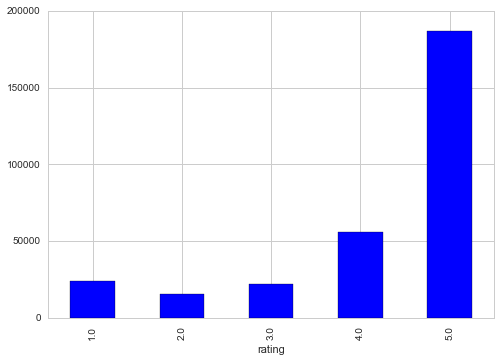

In [19]:
df_ratings.plot.bar()

Do ratings evolve over time?

In [20]:
def percentage_rating(year): 
    df_year = df[df.time.str.contains(year)]
    counts_year = df_year.groupby(['rating']).count().ix[:,0]
    print(df_year.shape)
    counts_year = counts_year/sum(counts_year)
    ret = pd.DataFrame(counts_year)
    ret.columns = [year]
    return ret.transpose()
percentage_rating('1999')

(92, 8)


rating,1.0,2.0,3.0,4.0,5.0
1999,0.01087,0.01087,0.076087,0.065217,0.836957


(92, 8)
(77151, 8)


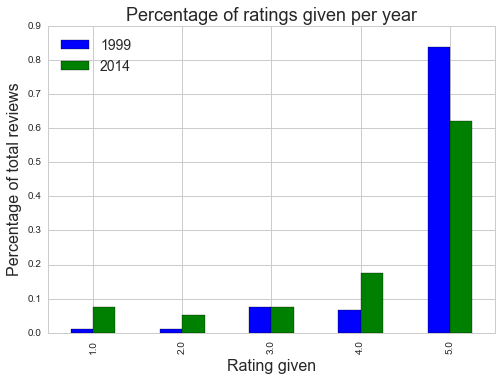

In [21]:
ax = pd.concat([percentage_rating('1999'), percentage_rating('2014')]).transpose().plot.bar()
ax.set_title("Percentage of ratings given per year", fontsize=18)
ax.set_xlabel("Rating given", fontsize=16)
ax.set_ylabel("Percentage of total reviews", fontsize=16)
ax.legend(loc=2,prop={'size':14})

### Comparison to the world

We will now start with making plots to compare the swiss products to the analysis of Max Woolf, as mentioned earlier.

In [22]:
df_user_review_counts = df.groupby(df.user_id)
counts = df_user_review_counts.count().ix[:,0].value_counts().sort_index()
counts

1     196810
2      20626
3       9887
4       2974
5       1551
6       1461
7        392
8        176
9         84
10       134
11        41
12        20
13        19
14        12
15         8
16         9
17         6
18         3
19         5
20         5
21         3
22         2
23         2
24         6
25         1
26         1
28         1
29         1
33         1
41         1
43         2
65         1
Name: item_id, dtype: int64

In [23]:
num_reviews = []
prop = []

s = 0
for i in range(0,counts.shape[0]):
    num_reviews.append(counts.index[i])
    s += counts.iloc[i]/sum(counts)
    prop.append(s)

df_counts = pd.DataFrame(
    {'num_reviews': num_reviews,
     'prop': prop
    })
df_counts.head()

,num_reviews,prop
0,1,0.840189
1,2,0.928242
2,3,0.970450
3,4,0.983146
4,5,0.989767


This graph shows the accumalative distribution of reviews a user gives on average on swiss products.

(0, 50)

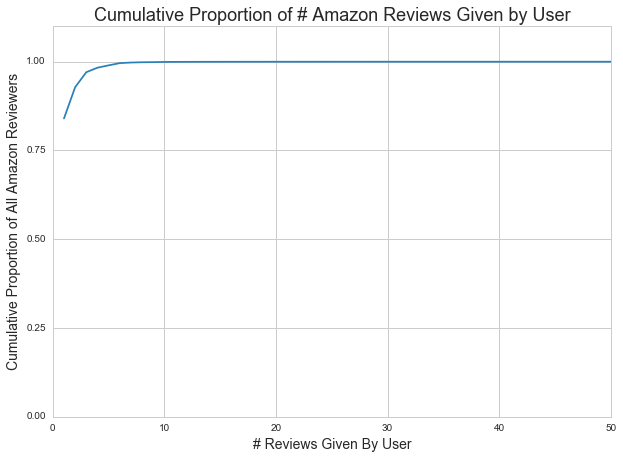

In [24]:
ax = df_counts.plot(x='num_reviews', y='prop', figsize=(10,7),
                    color="#2980b9", legend=None)
ax.set_title("Cumulative Proportion of # Amazon Reviews Given by User", fontsize=18)
ax.set_xlabel("# Reviews Given By User", fontsize=14)
ax.set_ylabel("Cumulative Proportion of All Amazon Reviewers", fontsize=14)
ax.set_ylim((0,1.1))
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.25))
ax.set_xlim((0,50))

In [25]:
df_user_review_counts = df.groupby(df.item_id)
counts = df_user_review_counts.count().ix[:,0].value_counts().sort_index()
counts

1       2503
2       1472
3        889
4        642
5        457
6        340
7        307
8        229
9        207
10       171
11       140
12       155
13       141
14       132
15        89
16        85
17        84
18        70
19        75
20        62
21        62
22        52
23        55
24        49
25        64
26        41
27        32
28        49
29        41
30        32
        ... 
1228       1
1256       1
1270       1
1307       1
1319       1
1416       1
1495       1
1525       1
1535       1
1542       1
1543       1
1546       1
1549       1
1572       1
1575       1
1578       1
1643       1
1691       1
1770       1
1791       1
1877       1
1910       1
2015       1
2180       1
2344       1
2425       1
2582       2
2729       1
3394       1
4185       1
Name: user_id, dtype: int64

In [26]:
num_reviews = []
prop = []

s = 0
for i in range(0,counts.shape[0]):
    num_reviews.append(counts.index[i])
    s += counts.iloc[i]/sum(counts)
    prop.append(s)

df_counts = pd.DataFrame(
    {'num_reviews': num_reviews,
     'prop': prop
    })
df_counts.head()

,num_reviews,prop
0,1,0.250250
1,2,0.397421
2,3,0.486303
3,4,0.550490
4,5,0.596181


This graph shows the accumalative distribution of reviews a swiss product receives on average.

(0, 50)

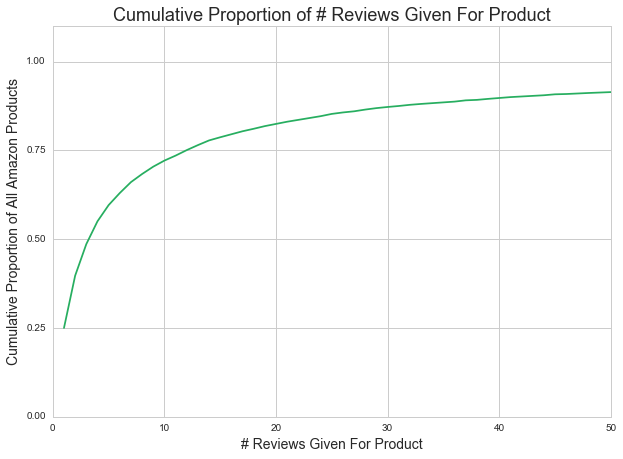

In [27]:
ax = df_counts.plot(x='num_reviews', y='prop', figsize=(10,7),
                    color="#27ae60", legend=None)
ax.set_title("Cumulative Proportion of # Reviews Given For Product", fontsize=18)
ax.set_xlabel("# Reviews Given For Product", fontsize=14)
ax.set_ylabel("Cumulative Proportion of All Amazon Products", fontsize=14)
ax.set_ylim((0,1.1))
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.25))
ax.set_xlim((0,50))

In [28]:
df_user_review_counts = df.groupby(df.category)
counts = df_user_review_counts.count().ix[:,0]

categories = pd.DataFrame({'avg_rating': df_user_review_counts.agg({'rating': 'mean'})['rating'], 
                            'count': counts})
categories

,avg_rating,count
category,,
all beauty,4.600000,10
all electronics,4.185185,270
amazon fashion,4.376923,130
appliances,4.600000,5
"arts, crafts & sewing",4.321429,476
automotive,4.020660,4453
baby,4.305796,2312
baby products,4.623529,510
beauty,4.281728,5878


This graph shows the average rating by product category.

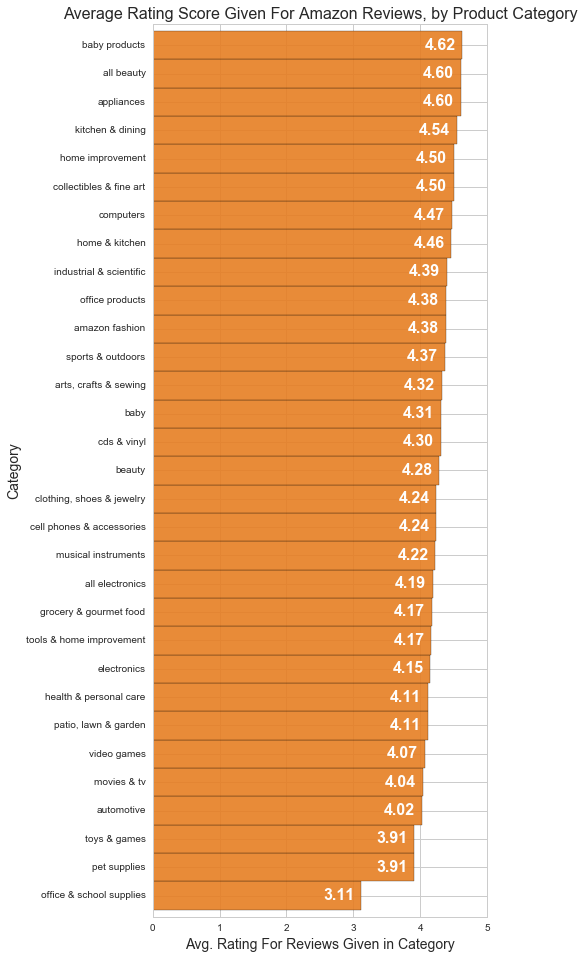

In [29]:
# [((categories.index == "baby products") | (categories.index == "office & school supplies"))]
cats = categories['avg_rating'].sort_values(ascending=True)
ax = cats.plot.barh(width=1.0, color = "#e67e22", alpha=0.9, figsize=(6, 16))
ax.set_title("Average Rating Score Given For Amazon Reviews, by Product Category", fontsize = 16)
ax.set_xlabel("Avg. Rating For Reviews Given in Category", fontsize = 14)
ax.set_ylabel("Category", fontsize = 14)
for i in range(0,cats.shape[0]):
    height = cats[i]
    ax.text(height-1/3, i-1/4,
            '%.2f' % height,
            ha='center', va='bottom', color = 'white', fontweight='bold', size=16)
    

## Distribution of ratings

In [30]:
counts = df.groupby(df.user_id).count().ix[:,0]
avg_rating = df.groupby(df.user_id).agg({'rating': 'mean'})['rating']

users = pd.DataFrame({'avg_rating': avg_rating, 
                            'count_reviews': counts})
users = users[users.count_reviews > 4]
users['avg_rating'] = round(users['avg_rating'],1)
users.head()

,avg_rating,count_reviews
user_id,,
A02444252I8NHTG9BGNBX,3.0,6
A1000I81ZDTJVE,5.0,6
A10097311BAFYJXQ2ZA7F,5.0,8
A100UD67AHFODS,4.3,7
A1029LADQF0L2O,5.0,6


In [31]:
counts = users['avg_rating'].value_counts()
counts = pd.DataFrame(counts).sort_index()
counts2 = counts.reset_index()
counts2.head()

,index,avg_rating
0,1.0,110
1,1.2,2
2,1.3,2
3,1.4,3
4,1.7,2


In [32]:
av = sum(counts2['index']*counts2['avg_rating'])/ sum(counts2['avg_rating'])
av

4.4306737588652476

This graph illustrates the average score a user gives (provided that he at least reviewd 5 products in our dataset).

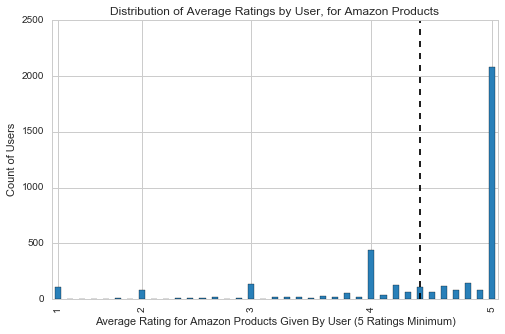

In [33]:
ax = counts.plot.bar(figsize=(8,5), color ='#2980b9', legend=None)
ax.axvline(counts2[counts2['index']==round(av,1)].index, color='k', linestyle='--')
ax.set_title("Distribution of Average Ratings by User, for Amazon Products")
ax.set_xlabel("Average Rating for Amazon Products Given By User (5 Ratings Minimum)")
ax.set_ylabel("Count of Users")
ax.set_xticks([0,7,16,26,36])
ax.set_xticklabels(['1','2','3','4','5'])

In [34]:
counts = df.groupby(df.item_id).count().ix[:,0]
avg_rating = df.groupby(df.item_id).agg({'rating': 'mean'})['rating']

products = pd.DataFrame({'avg_rating': avg_rating, 
                            'count_reviews': counts})
products = products[products.count_reviews > 4]
products['avg_rating'] = round(products['avg_rating'],1)
products.head()

,avg_rating,count_reviews
item_id,,
0767821556,4.6,190
0800121260,4.4,49
0978571630,4.2,5
B000002HK4,4.6,98
B00000JXTC,4.7,7


In [35]:
counts = products['avg_rating'].value_counts()
counts = pd.DataFrame(counts).sort_index()
counts2 = counts.reset_index()
counts2.head()

,index,avg_rating
0,1.1,1
1,1.2,1
2,1.3,3
3,1.4,2
4,1.5,5


In [36]:
av = sum(counts2['index']*counts2['avg_rating'])/ sum(counts2['avg_rating'])
av

4.1539145907473314

This graph illustrates the average score a product has (provided that it has at least 5 reviews).

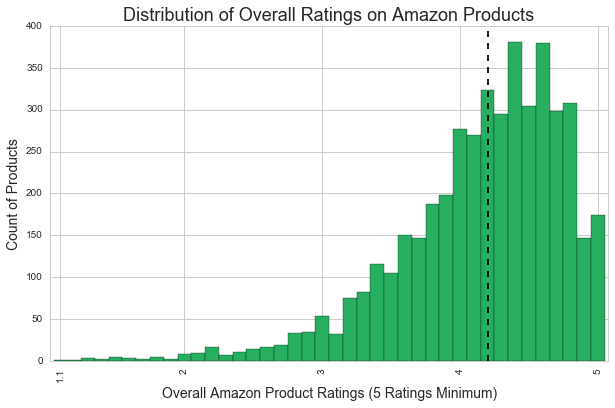

In [37]:
ax = counts.plot.bar(figsize=(10,6), color ='#27ae60', legend=None, width = 1)
ax.axvline(counts2[counts2['index']==round(av,1)].index, color='k', linestyle='--')
ax.set_title("Distribution of Overall Ratings on Amazon Products", fontsize = 18)
ax.set_xlabel("Overall Amazon Product Ratings (5 Ratings Minimum)", fontsize = 14)
ax.set_ylabel("Count of Products", fontsize = 14)
ax.set_xticks([0,9,19,29,39])
ax.set_xticklabels(['1.1','2','3','4','5'])

In [38]:
df_breakdown_users =df[df.nth_user <= 50].groupby(['nth_user', 'rating']).count()
df_breakdown_users = df_breakdown_users.reset_index(level=1)
df_breakdown_users.head()

,rating,user_id,item_id,timestamp,category,nth_product,time
nth_user,,,,,,,
1,1.0,20424,20424,20424,20424,20424,20424
1,2.0,12364,12364,12364,12364,12364,12364
1,3.0,17243,17243,17243,17243,17243,17243
1,4.0,42676,42676,42676,42676,42676,42676
1,5.0,141538,141538,141538,141538,141538,141538


In [39]:
s = 0
df2 = pd.DataFrame({'rating_5':[], 'rating_4':[], 'rating_3':[], 'rating_2':[], 'rating_1':[]})
for i in range(1,51):
    s = sum(df_breakdown_users[df_breakdown_users.index == i]['user_id'])
    df2 = df2.append(pd.DataFrame({'rating_5':[0],
                                       'rating_4':[0],
                                       'rating_3':[0],
                                       'rating_2':[0],
                                       'rating_1':[0]},
                    index = [i]))
    for j in range(1,6):
        result = df_breakdown_users[(df_breakdown_users.index == i) & (df_breakdown_users.rating == j*1.0)]
        if not result.empty:
            df2.set_value(i,'rating_'+str(j), result.user_id/s)

df2 = df2[["rating_5","rating_4","rating_3","rating_2","rating_1"]]
df2.head()

,rating_5,rating_4,rating_3,rating_2,rating_1
1,0.604231,0.182185,0.073611,0.052782,0.087191
2,0.634166,0.186296,0.072766,0.048297,0.058475
3,0.654590,0.187757,0.065025,0.045511,0.047118
4,0.670615,0.186507,0.068477,0.037995,0.036406
5,0.675532,0.186930,0.066363,0.031915,0.039260


This graph shows how the ratings a person gives evolve over time on average.

(0, 1)

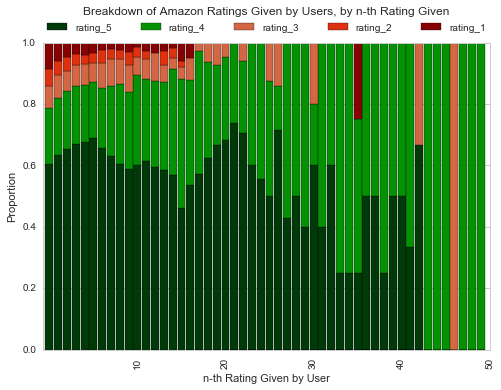

In [40]:
ax = df2.plot.bar(stacked=True, color = ['#003a09', '#049104', '#d36743', '#dd310f', '#870202'], width = 0.9)
ax.set_xticks([10,20,30,40,50])
ax.set_xticklabels(['10','20','30','40','50'])
ax.set_title("Breakdown of Amazon Ratings Given by Users, by n-th Rating Given\n\n")
ax.set_xlabel("n-th Rating Given by User")
ax.set_ylabel("Proportion")
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)
ax.set_ylim((0,1))

In [41]:
df_breakdown_users =df[df.nth_product <= 50].groupby(['nth_product', 'rating']).count()
df_breakdown_users = df_breakdown_users.reset_index(level=1)
df_breakdown_users.head()

,rating,user_id,item_id,timestamp,category,nth_user,time
nth_product,,,,,,,
1,1.0,789,789,789,789,789,789
1,2.0,464,464,464,464,464,464
1,3.0,701,701,701,701,701,701
1,4.0,1727,1727,1727,1727,1727,1727
1,5.0,6321,6321,6321,6321,6321,6321


In [42]:
s = 0
df2 = pd.DataFrame({'rating_5':[], 'rating_4':[], 'rating_3':[], 'rating_2':[], 'rating_1':[]})
for i in range(1,51):
    s = sum(df_breakdown_users[df_breakdown_users.index == i]['item_id'])
    df2 = df2.append(pd.DataFrame({'rating_5':[0],
                                       'rating_4':[0],
                                       'rating_3':[0],
                                       'rating_2':[0],
                                       'rating_1':[0]},
                    index = [i]))
    for j in range(1,6):
        result = df_breakdown_users[(df_breakdown_users.index == i) & (df_breakdown_users.rating == j*1.0)]
        if not result.empty:
            df2.set_value(i,'rating_'+str(j), result.user_id/s)

df2 = df2[["rating_5","rating_4","rating_3","rating_2","rating_1"]]
df2.head()

,rating_5,rating_4,rating_3,rating_2,rating_1
1,0.631974,0.172665,0.070086,0.046391,0.078884
2,0.624350,0.163488,0.073610,0.045873,0.092679
3,0.620043,0.159615,0.078314,0.054920,0.087108
4,0.610354,0.179447,0.073180,0.047489,0.089529
5,0.616103,0.181050,0.068060,0.043817,0.090970


This graph shows how the ratings a product receives evolve over time on average.

(0, 1)

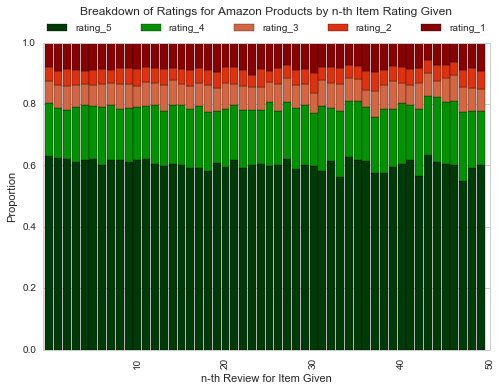

In [43]:
ax = df2.plot.bar(stacked=True, color = ['#003a09', '#049104', '#d36743', '#dd310f', '#870202'], width = 0.9)
ax.set_xticks([10,20,30,40,50])
ax.set_xticklabels(['10','20','30','40','50'])
ax.set_title("Breakdown of Ratings for Amazon Products by n-th Item Rating Given\n\n")
ax.set_xlabel("n-th Review for Item Given")
ax.set_ylabel("Proportion")
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)
ax.set_ylim((0,1))